In [1]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd /content/drive/MyDrive/DeepLearning/sign_language_mnist/data
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

/content/drive/MyDrive/DeepLearning/sign_language_mnist/data


In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
import plotly.express as px
class_order = sorted(df_train['label'].unique())
label_annotations = {class_label: chr(97 + i) for i, class_label in enumerate(class_order)}
title = 'Số lượng các lớp'

fig = px.histogram(df_train, x='label', color='label',title=title,width=700, height=500,category_orders={'label': class_order})

for i, class_label in enumerate(class_order):
    fig.data[i].name = label_annotations[class_label]

fig.show()

In [5]:
X_train, y_train = df_train.iloc[:, 1:].values, df_train['label'].values
X_test, y_test = df_test.iloc[:, 1:].values, df_test['label'].values

print(X_train.shape, X_test.shape)

(27455, 784) (7172, 784)


In [6]:
label = np.unique(y_train)
print(label)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [7]:
X_train = np.array(X_train.reshape(-1,28,28,1))
X_test = np.array(X_test.reshape(-1,28,28,1))

print(X_train.shape, X_test.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [8]:
def add_img(dir, label_mapping, X, y):
# dir = '/content/drive/MyDrive/DeepLearning/sign_language_mnist/data/alphabet'
    image_list = []
    label_list = []

    for folder_name in os.listdir(dir):
        folder_path = os.path.join(dir, folder_name)
        if os.path.isdir(folder_path):
            label = label_mapping.get(folder_name, 0)
            for name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, name)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                image = np.expand_dims(image, axis=-1)
                image_list.append(image)
                label_list.append(label)
    print(label_mapping)
    print(np.unique(label_list))
    X_add = np.array(image_list)
    y_add = np.array(label_list)

    X = np.concatenate((X, X_add), axis=0)
    y = np.concatenate((y, y_add), axis=0)

    print(X.shape, y.shape)
    return X, y

In [9]:
import string
label_mapping = {letter: idx if idx < 9 else idx+1 for idx, letter in enumerate(string.ascii_lowercase[:9] + string.ascii_lowercase[10:25])}
dir = '/content/drive/MyDrive/DeepLearning/sign_language_mnist/data/alphabet'
X_train, y_train = add_img(dir, label_mapping, X_train, y_train)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24}
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(31905, 28, 28, 1) (31905,)


In [10]:
label_mapping = {'k':10, 'l':11, 'm': 12, 'n': 13, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22}
dir = '/content/drive/MyDrive/DeepLearning/sign_language_mnist/data/alpha_add'
X_train, y_train = add_img(dir, label_mapping, X_train, y_train)

{'k': 10, 'l': 11, 'm': 12, 'n': 13, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22}
[10 11 12 13 16 17 18 19 20 21 22]
(34107, 28, 28, 1) (34107,)


In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_scaled, X_test_scaled = X_train/255, X_test/255

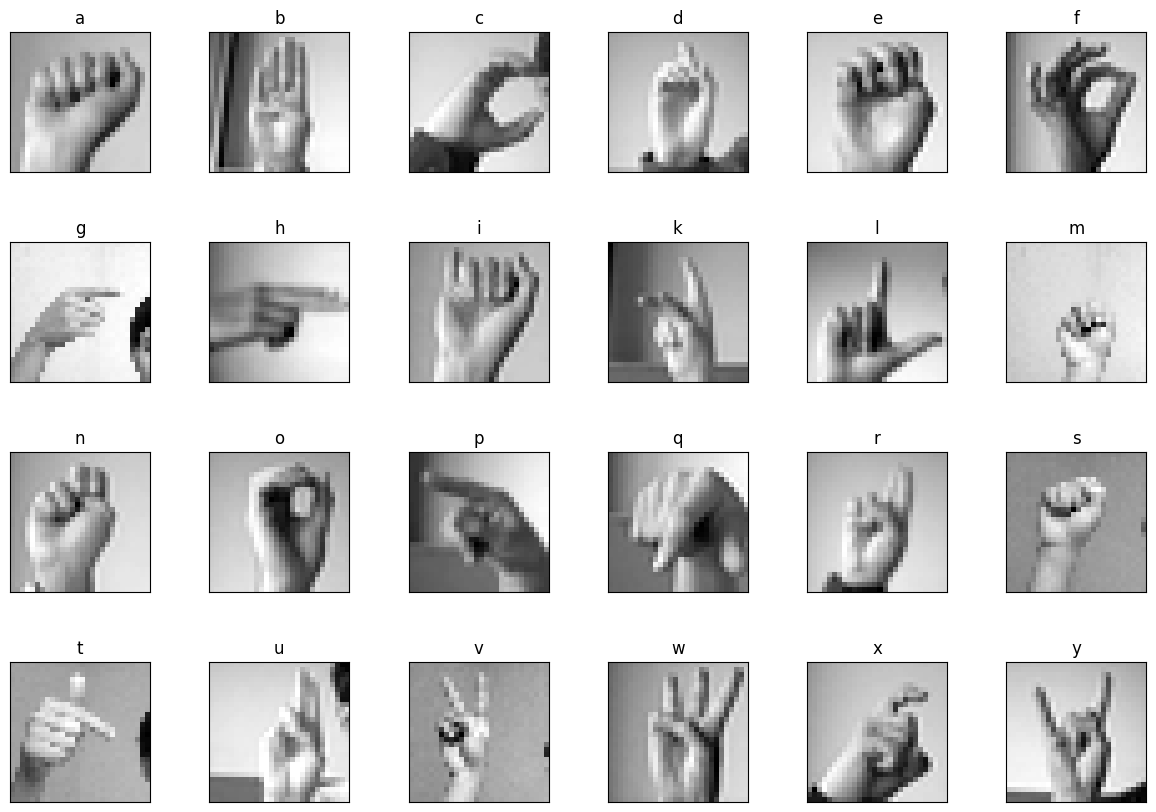

In [13]:
unique_classes = np.unique(y_train)

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, class_label in enumerate(unique_classes):
    # Find the index of the first image with the current class
    index = np.where(y_train == class_label)[0][0]
    plt.subplot(4, 6, i + 1)
    plt.imshow(X_train[index], cmap='gray')
    if i >= 9:
        plt.title(f'{chr(97+1 + i)}')
    else:
      plt.title(f'{chr(97 + i)}')

plt.subplots_adjust(hspace=0.5)
plt.savefig('sign_language.png')

In [14]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_scaled = lb.fit_transform(y_train)
y_test_scaled = lb.fit_transform(y_test)

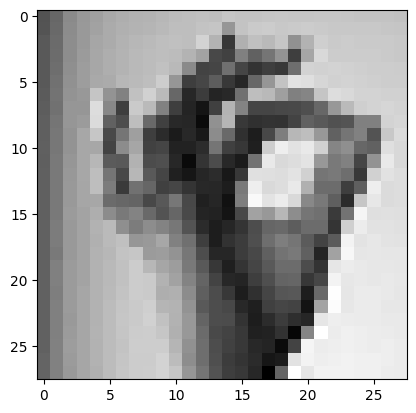

In [15]:
plt.imshow(X_train[10], cmap='gray')

In [16]:
import keras
from keras.models import Model, Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense

In [17]:
unique_value = np.array(y_train)
num_cls = len(np.unique(unique_value))
print(num_cls)

24


In [ ]:
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (28, 28, 1), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# model.add(Dense(num_cls))
# model.add(Activation('softmax'))

In [ ]:
# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.20))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.20))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.20))
# model.add(Dense(num_cls, activation = 'softmax'))

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_cls, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7

In [20]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [21]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled, y_train_scaled, batch_size=64, epochs=100, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/100
533/533 [==============================] - 9s 7ms/step - loss: 1.8455 - accuracy: 0.4181 - val_loss: 0.7234 - val_accuracy: 0.7769
Epoch 2/100
533/533 [==============================] - 3s 5ms/step - loss: 0.6431 - accuracy: 0.7896 - val_loss: 0.4032 - val_accuracy: 0.8692
Epoch 3/100
533/533 [==============================] - 3s 7ms/step - loss: 0.3669 - accuracy: 0.8820 - val_loss: 0.3077 - val_accuracy: 0.9066
Epoch 4/100
533/533 [==============================] - 3s 5ms/step - loss: 0.2457 - accuracy: 0.9219 - val_loss: 0.2790 - val_accuracy: 0.9159
Epoch 5/100
533/533 [==============================] - 3s 5ms/step - loss: 0.1816 - accuracy: 0.9424 - val_loss: 0.2275 - val_accuracy: 0.9144
Epoch 6/100
533/533 [==============================] - 3s 5ms/step - loss: 0.1493 - accuracy: 0.9530 - val_loss: 0.2383 - val_accuracy: 0.9117
Epoch 7/100
533/533 [==============================] - 3s 6ms/step - loss: 0.1184 - accuracy: 0.9638 - val_loss: 0.2062 - val_accuracy: 0.9340

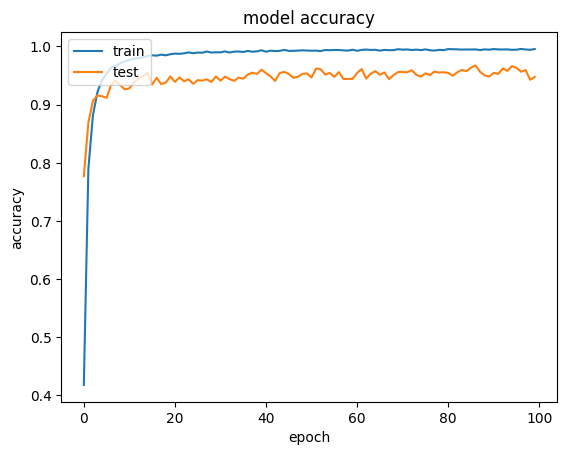

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

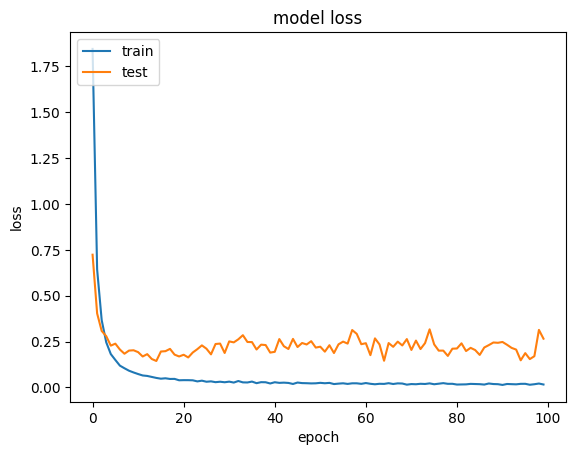

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('sign_lang6.h5')